Моделі

Встановлення бібліотек

In [20]:
pip install --upgrade scipy



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


1. Фінансовий аналіз (ROI, Break-Even Point)

In [21]:
# ROI (Return on Investment) calculation
initial_investment = 20000  # Вхідні інвестиції
revenue = 50000             # Доходи
costs = 40000                # Витрати

roi = (revenue - costs) / initial_investment * 100
print(f"ROI: {roi:.2f}%")

# Break-Even Point (точка беззбитковості)
fixed_costs = 4000
price_per_unit = 40
variable_costs_per_unit = 30

break_even_units = fixed_costs / (price_per_unit - variable_costs_per_unit)
print(f"Точка беззбитковості: {break_even_units:.0f} одиниць")

ROI: 50.00%
Точка беззбитковості: 400 одиниць


2. Прогнозування продажів на основі трендів

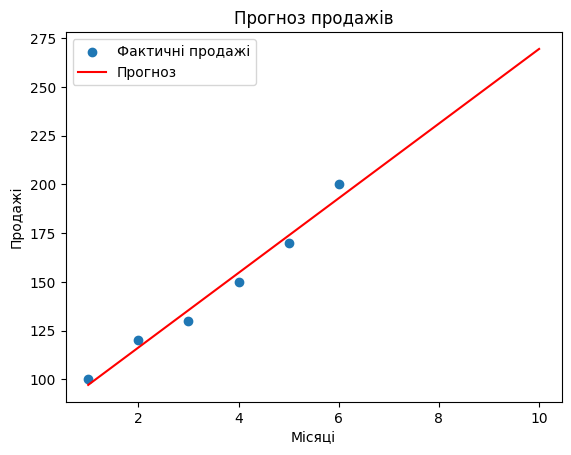

Прогнозовані продажі на наступні місяці: [212.         231.14285714 250.28571429 269.42857143]


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Дані про продажі (місяць, обсяг продажів)
months = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
sales = np.array([100, 120, 130, 150, 170, 200])

# Лінійна регресія
model = LinearRegression()
model.fit(months, sales)

# Прогноз продажів
future_months = np.array([7, 8, 9, 10]).reshape(-1, 1)
predicted_sales = model.predict(future_months)

# Візуалізація
plt.scatter(months, sales, label="Фактичні продажі")
plt.plot(np.vstack((months, future_months)), 
         model.predict(np.vstack((months, future_months))), color='red', label="Прогноз")
plt.legend()
plt.title("Прогноз продажів")
plt.xlabel("Місяці")
plt.ylabel("Продажі")
plt.show()

print("Прогнозовані продажі на наступні місяці:", predicted_sales)


3. Оптимізація витрат із використанням лінійного програмування 

In [1]:
from scipy.optimize import linprog

# Прибуток по продукту 1 і продукту 2 = Дохід - Витрати (мінімізуємо -прибуток, тобто максимізуємо прибуток)
profit = [-70, -60]  # Мінімізуємо -70x1 - 60x2 (що рівносильно максимізації 70x1 + 60x2)

# Ліва частина обмежень (коефіцієнти використання ресурсів)
constraints_lhs = [
    [2, 1],  # Використання ресурсу 1 (2x1 + 1x2 <= 2000)
    [1, 3]   # Використання ресурсу 2 (1x1 + 3x2 <= 1900)
]

# Права частина обмежень (максимально доступні ресурси)
constraints_rhs = [2000, 1900]

# Межі змінних (кількість продуктів не може бути від’ємною)
bounds = [(0, None), (0, None)]

# Виконання оптимізації
result = linprog(
    c=profit,              # Коефіцієнти цільової функції (мінімізуємо -прибуток)
    A_ub=constraints_lhs,  # Ліва частина обмежень (нерівності ≤)
    b_ub=constraints_rhs,  # Права частина обмежень
    bounds=bounds,         # Межі змінних (x1, x2 ≥ 0)
    method='highs'         # Метод оптимізації
)

# Вивід результату
if result.success:
    print("Оптимальна кількість продуктів:")
    print(f"Продукт 1: {result.x[0]:.2f} одиниць")
    print(f"Продукт 2: {result.x[1]:.2f} одиниць")
    print(f"Максимальний прибуток: {-result.fun:.2f} грошових одиниць")
else:
    print("Рішення не знайдено. Перевірте обмеження та вхідні дані.")





Оптимальна кількість продуктів:
Продукт 1: 820.00 одиниць
Продукт 2: 360.00 одиниць
Максимальний прибуток: 79000.00 грошових одиниць


In [ ]:
4. Планування маркетингового бюджету

In [3]:
# Дані про бюджет та ефективність
channels = ["SEO", "PPC", "SMM"]
costs = [5000, 7000, 3000]
roi = [1.8, 1.5, 2.2]  # ROI для кожного каналу

# Розподіл бюджету
total_budget = 15000
allocation = [total_budget * (r / sum(roi)) for r in roi]

for channel, budget in zip(channels, allocation):
    print(f"Канал: {channel}, Бюджет: ${budget:.2f}")


Канал: SEO, Бюджет: $4909.09
Канал: PPC, Бюджет: $4090.91
Канал: SMM, Бюджет: $6000.00


5. Аналіз клієнтської бази за допомогою кластеризації (K-Means)

In [5]:
import matplotlib.pyplot as plt


   Вік  Доходи  Кластер
0   25   20000        1
1   34   32000        0
2   45   45000        0
3   23   18000        1
4   35   35000        0
5   40   40000        0
6   50   50000        0
7   60   60000        0


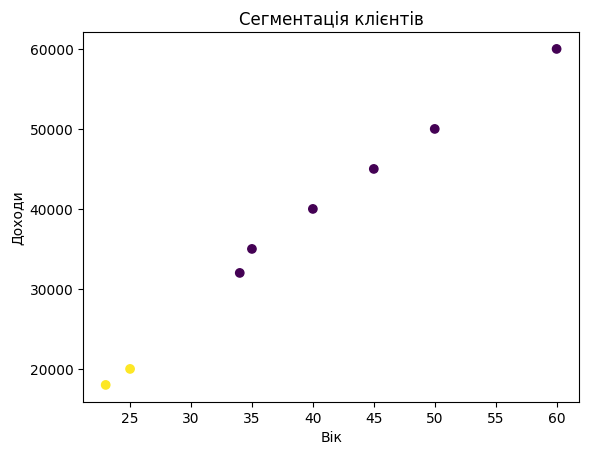

In [6]:
from sklearn.cluster import KMeans
import pandas as pd

# Дані про клієнтів
data = pd.DataFrame({
    'Вік': [25, 34, 45, 23, 35, 40, 50, 60],
    'Доходи': [20000, 32000, 45000, 18000, 35000, 40000, 50000, 60000]
})

# Модель K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
data['Кластер'] = kmeans.fit_predict(data)

print(data)

# Візуалізація
plt.scatter(data['Вік'], data['Доходи'], c=data['Кластер'], cmap='viridis')
plt.title("Сегментація клієнтів")
plt.xlabel("Вік")
plt.ylabel("Доходи")
plt.show()
